In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
d1=pd.read_csv("C:/Users/Rehaman shaik/Desktop/data science practice session/assisgments/KNN/glass.csv")
d1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
# Histograms for all numerical columns

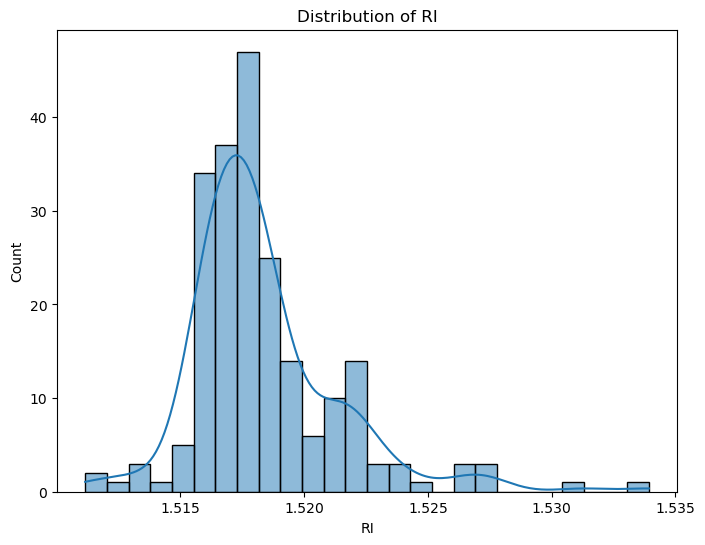

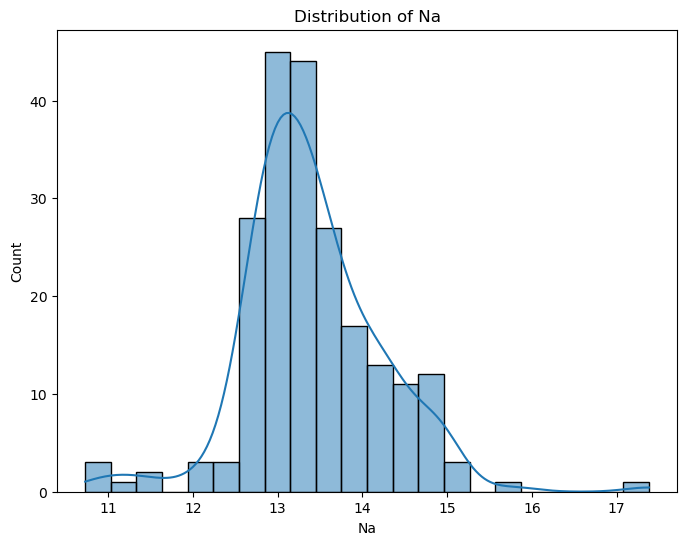

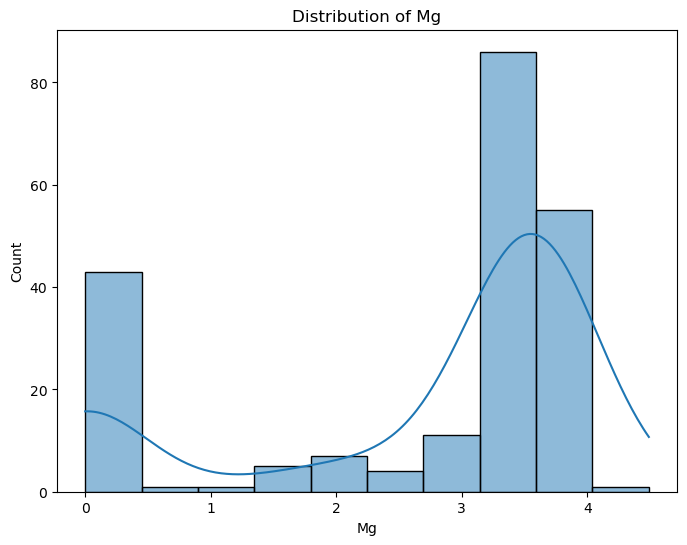

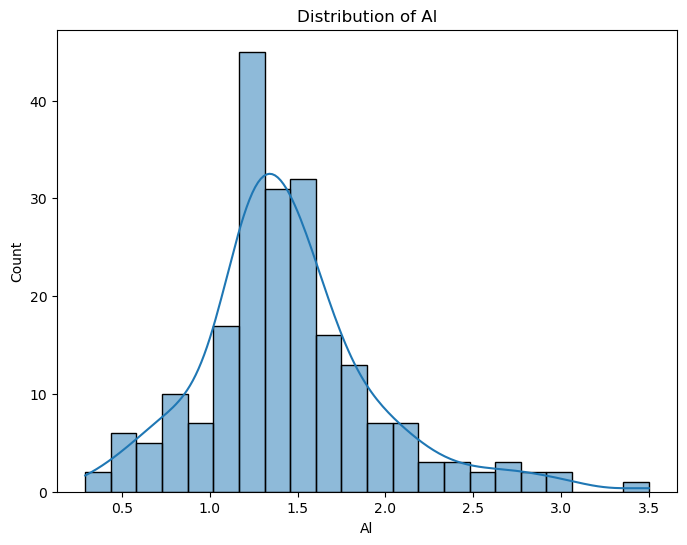

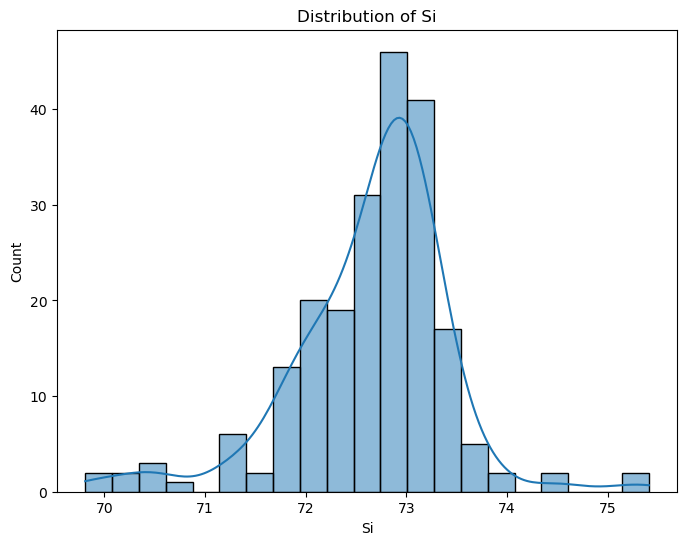

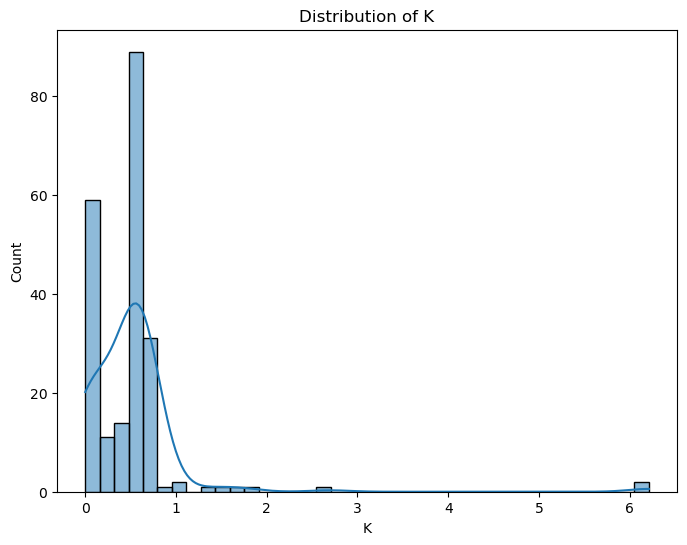

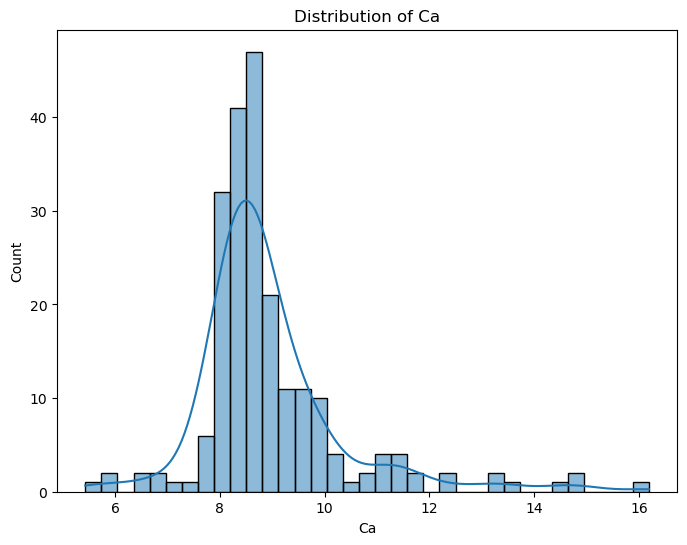

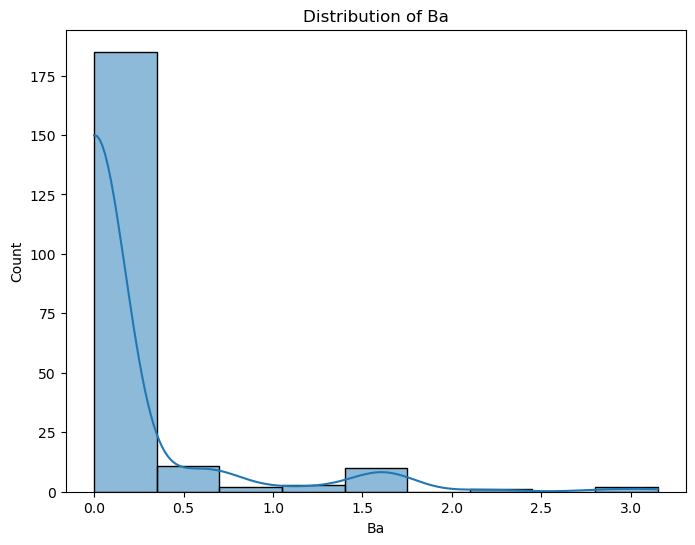

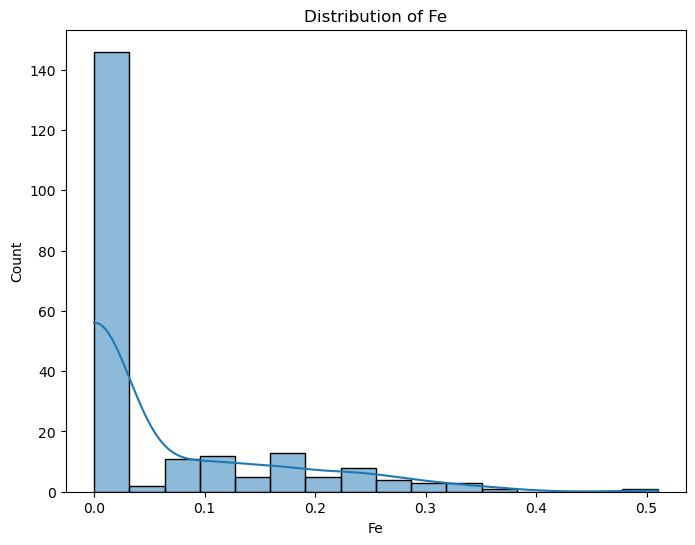

In [5]:
for column in d1.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=d1, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [6]:
# Box plot for each feature

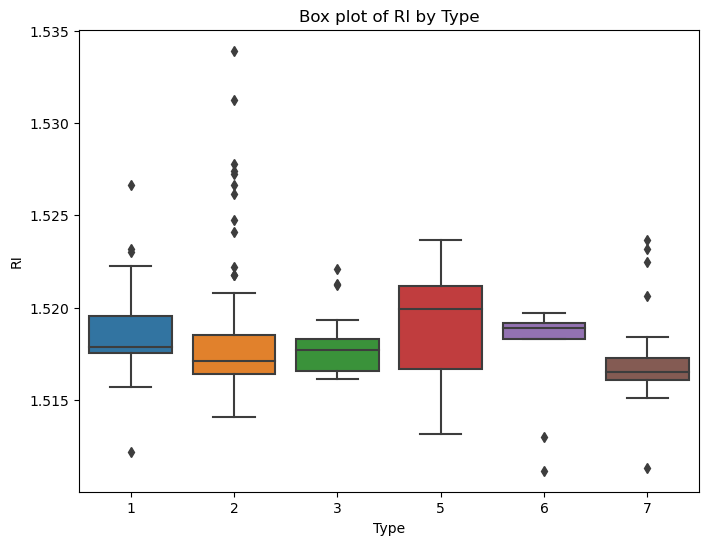

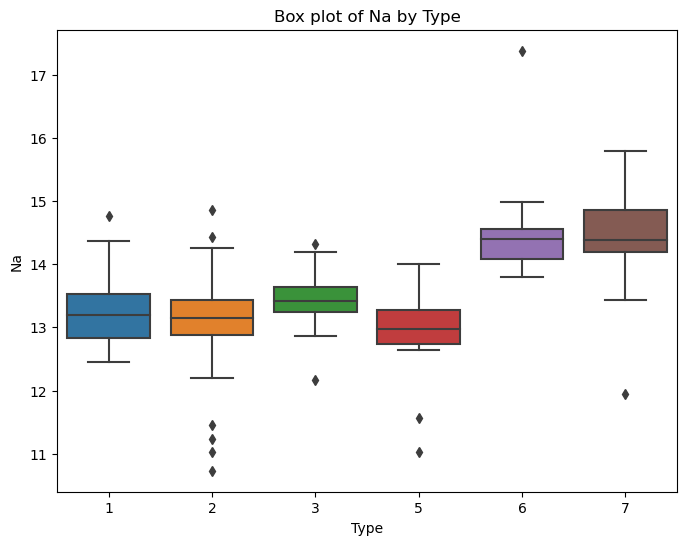

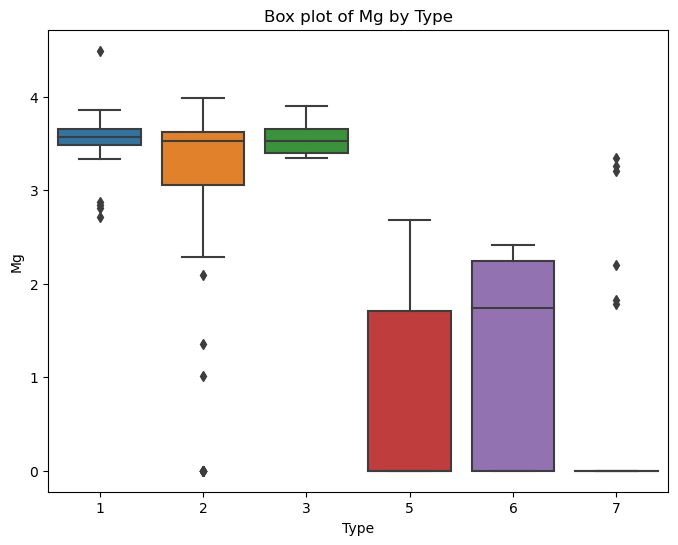

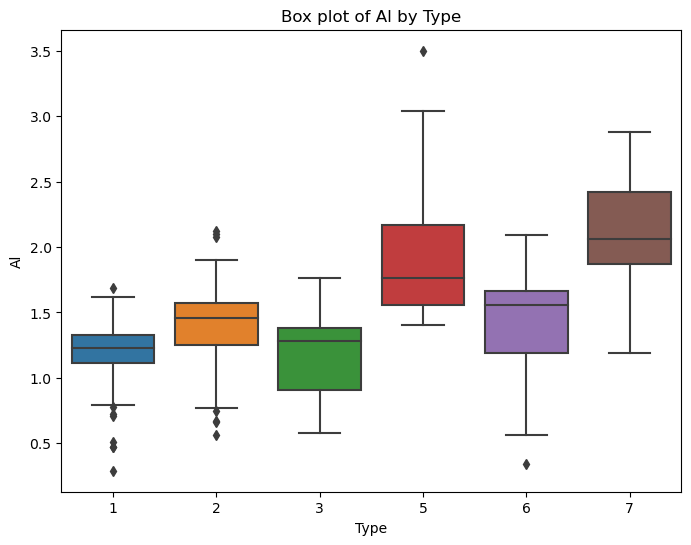

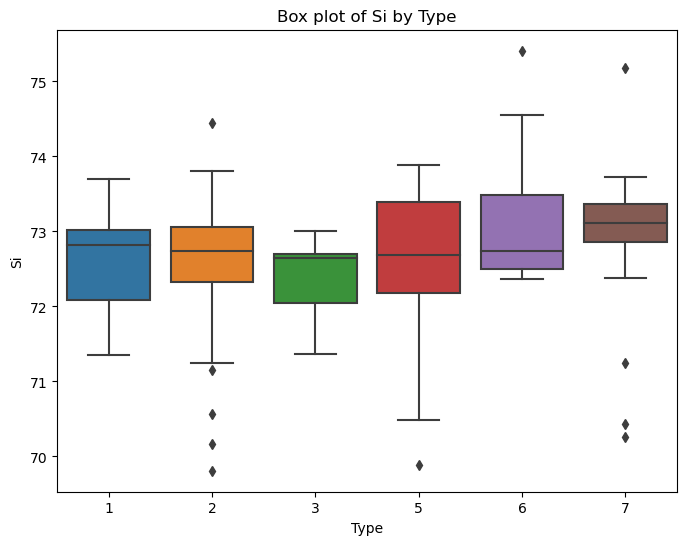

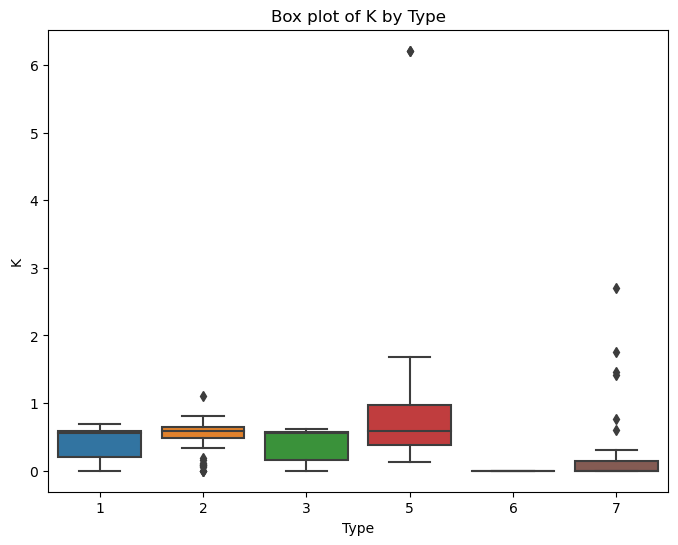

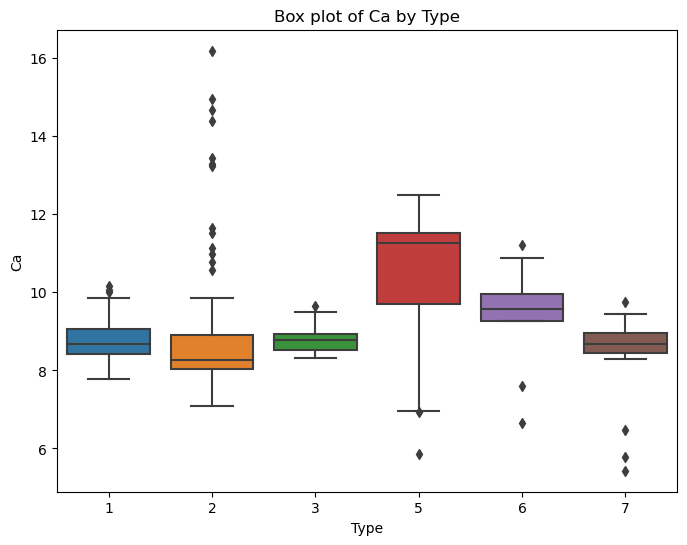

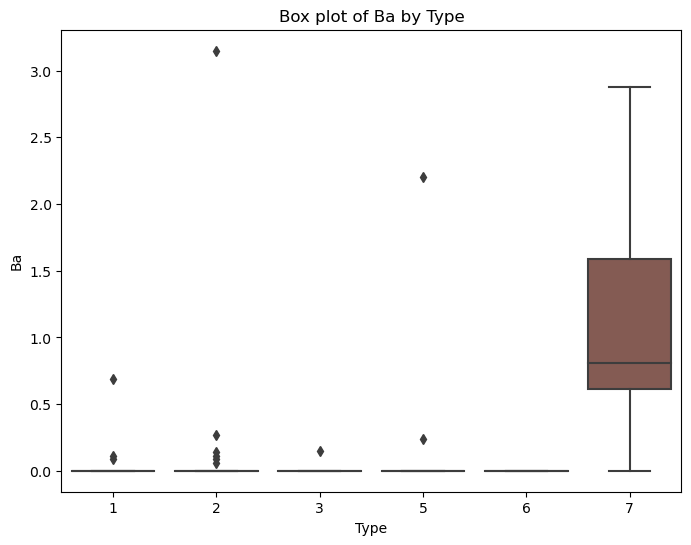

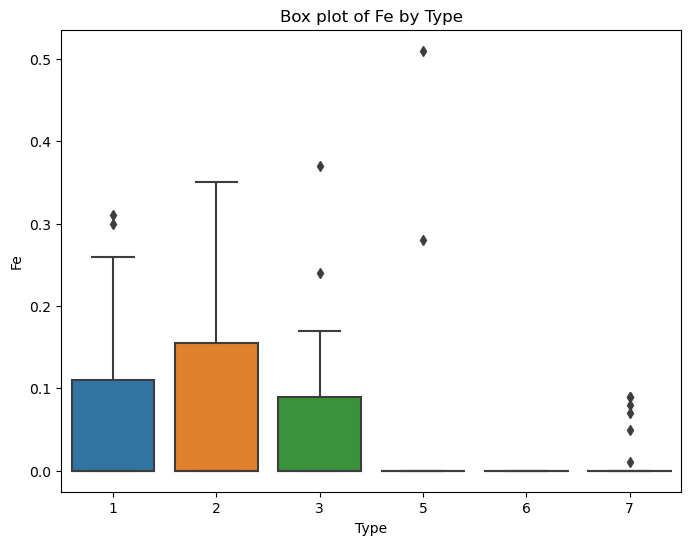

In [7]:
for column in d1.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=d1, x='Type', y=column)
    plt.title(f'Box plot of {column} by Type')
    plt.show()

In [8]:
#assining target variable

In [9]:
y=d1["Type"]
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [10]:
x=d1.drop("Type",axis=1)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [11]:
#data preprocessing

In [12]:
for columns in x.columns:
    from sklearn.preprocessing import StandardScaler
    ss=StandardScaler()
    x[columns]=ss.fit_transform(d1[[columns]])

In [13]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [14]:
knn=KNeighborsClassifier(n_neighbors=15)
k1_train=[]
k1_test=[]
train_accuracy=[]
test_accuracy=[]

In [15]:
#cros validation with KNN 

In [16]:
for i in range(1,101):
    x_train,x_test,y_train,y_test= train_test_split(x, y,test_size=0.30,random_state=i)
    knn.fit(x_train,y_train)
    y_pred_train=knn.predict(x_train)
    y_pred_test=knn.predict(x_test)
    train_accuracy.append(accuracy_score(y_train, y_pred_train).round(3))
    test_accuracy.append(accuracy_score(y_test, y_pred_test).round(3))

In [17]:
print("average training accuracy:",np.mean(train_accuracy).round(3))
print("average test accuracy score:",np.mean(test_accuracy).round(3))

average training accuracy: 0.668
average test accuracy score: 0.612


In [18]:
k1_train.append(np.mean(train_accuracy))
k1_test.append(np.mean(test_accuracy))
print("K1_train with different n_neighbours",np.mean(k1_train).round(3))
print("k1 test with different n_neighbours",np.mean(k1_test).round(3))    

K1_train with different n_neighbours 0.668
k1 test with different n_neighbours 0.612
